In [1]:
import h5py as h
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib widget

In [2]:
fname = "/Volumes/ME424_HD/nanopores/2023_03_23/ch1/pore7/data0/EVENTS.hdf5"
file = h.File(fname, 'r')

In [3]:
data = file["current_data"]
sets = list(data.keys())

In [4]:
data[sets[1]]

<HDF5 dataset "Event_No_10": shape (4291,), type "<f8">

In [5]:
df = pd.DataFrame()
for set in data:
    props = dict(data[set].attrs)
    row = pd.DataFrame([pd.Series(data = [set,*props.values()], index = ["name", *props.keys()])])
    df = pd.concat([df, row], ignore_index = True)

In [6]:
df

,name,duration_s,ecd,ffap,lfap,linearity,mean,samples
0,Event_No_1,0.000000,0.000000,NaN,NaN,NaN,NaN,0
1,Event_No_10,0.003292,-0.000140,0.196157,0.304966,0.001067,-0.042533,3292
2,Event_No_100,0.000735,-0.000005,0.181045,0.184960,0.000347,-0.007018,735
3,Event_No_101,0.001187,-0.000011,0.169237,0.191104,0.000339,-0.009567,1187
4,Event_No_102,0.024792,-0.001213,0.078069,0.054277,0.000575,-0.048921,24792
...,...,...,...,...,...,...,...,...
130,Event_No_95,0.011860,-0.000299,0.214303,0.089556,0.000285,-0.025175,11860
131,Event_No_96,0.006849,-0.000160,0.239894,0.067957,0.000231,-0.023355,6849
132,Event_No_97,0.000868,-0.000006,0.156010,0.250142,0.000330,-0.006600,868
133,Event_No_98,0.001386,-0.000013,0.187027,0.235804,0.000267,-0.009099,1386


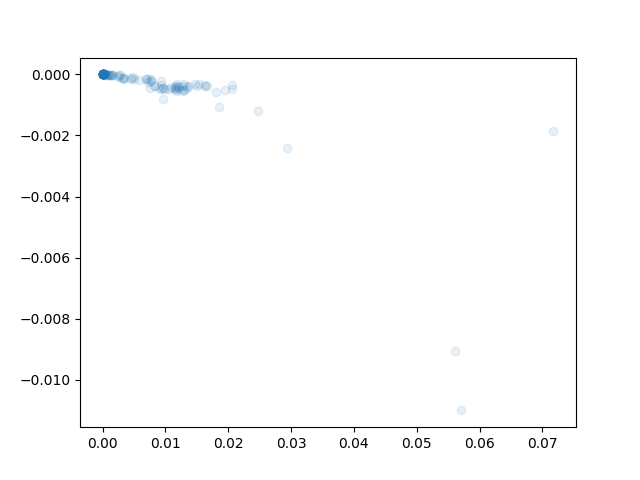

In [7]:
plt.figure()
plt.scatter(df.duration_s,df.ecd,alpha = 0.1)

In [8]:
df_filt = df.query('samples > 5000 & ecd < -0.000276 & samples < 200000')

In [9]:
df_filt

,name,duration_s,ecd,ffap,lfap,linearity,mean,samples
4,Event_No_102,0.024792,-0.001213,0.078069,0.054277,0.000575,-0.048921,24792
5,Event_No_103,0.057067,-0.011007,0.171367,0.214201,0.000290,-0.192883,57067
6,Event_No_104,0.008166,-0.000395,0.265033,0.140718,0.000330,-0.048418,8166
7,Event_No_105,0.012658,-0.000386,0.245917,0.132073,0.000162,-0.030533,12658
12,Event_No_11,0.020663,-0.000483,0.319204,0.182984,0.000119,-0.023364,20663
13,Event_No_110,0.009593,-0.000449,0.190451,0.160792,0.000189,-0.046764,9593
14,Event_No_111,0.011998,-0.000424,0.241759,0.118811,0.000172,-0.035329,11998
15,Event_No_112,0.012123,-0.000462,0.216373,0.121143,0.000313,-0.038108,12123
19,Event_No_116,0.014774,-0.000308,0.189045,0.240790,0.000129,-0.020879,14774
20,Event_No_117,0.013261,-0.000386,0.129607,0.141307,0.000322,-0.029089,13261


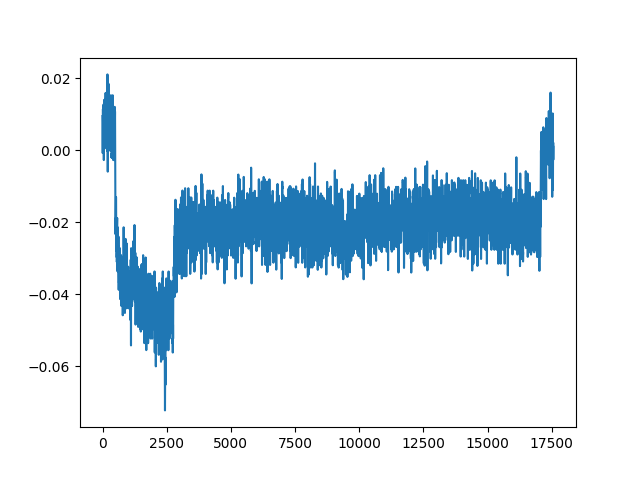

In [10]:
plt.figure()
plt.plot(data['Event_No_3'][:])

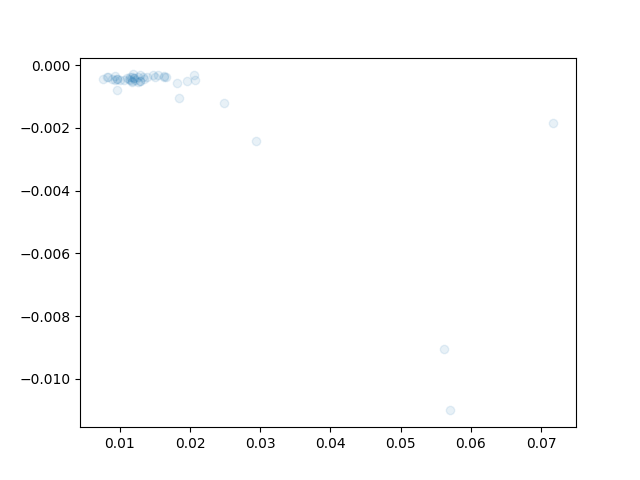

In [11]:
plt.figure()
plt.scatter(df_filt.duration_s,df_filt.ecd,alpha=0.1)

In [12]:
len(df_filt)

46

In [13]:
import random

choices = random.choices(list(df_filt.name), k=5)

In [14]:
print(choices)

['Event_No_13', 'Event_No_105', 'Event_No_104', 'Event_No_121', 'Event_No_21']


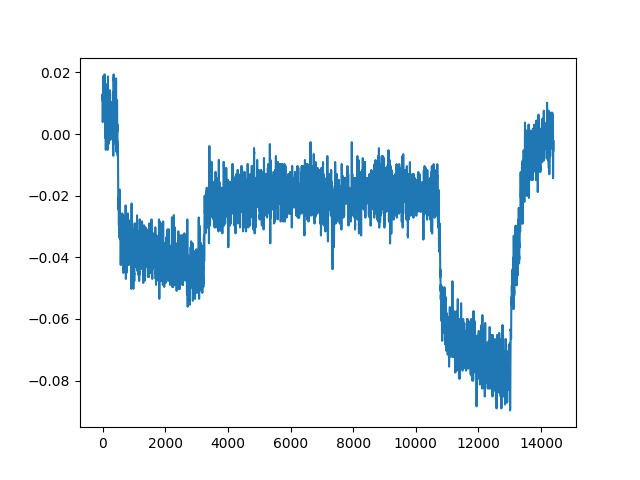

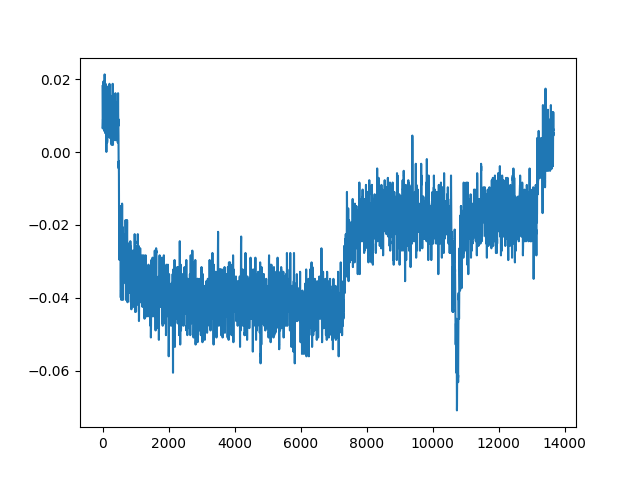

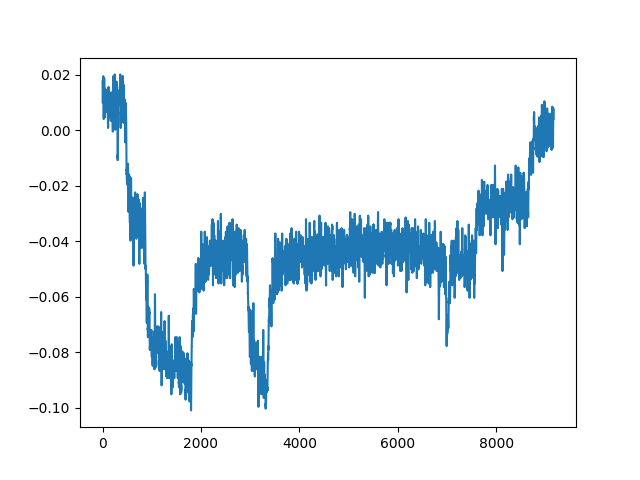

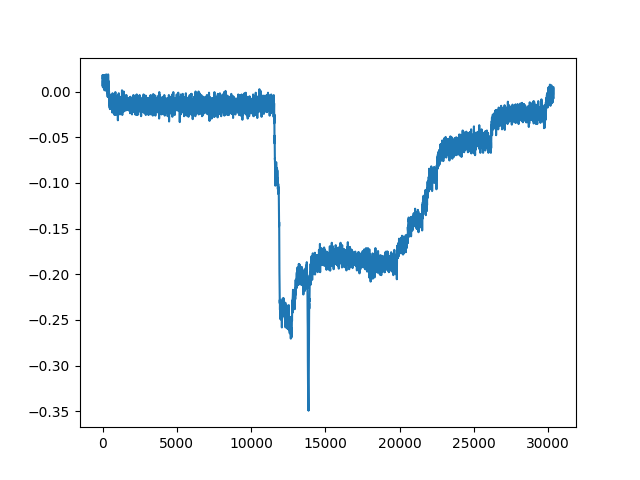

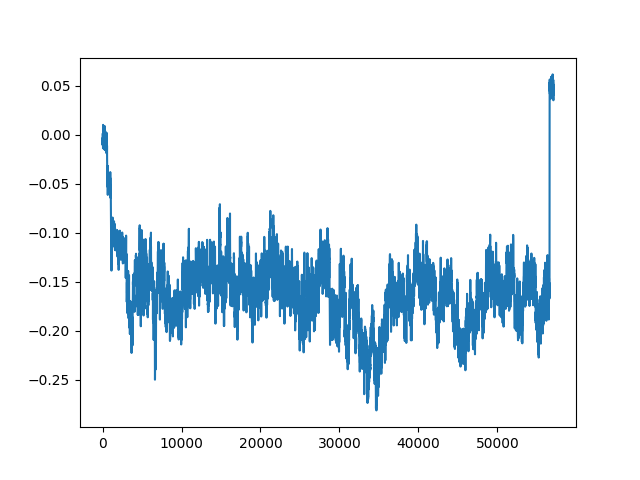

In [15]:
for choice in choices:
    plt.figure()
    plt.plot(data[choice][:])

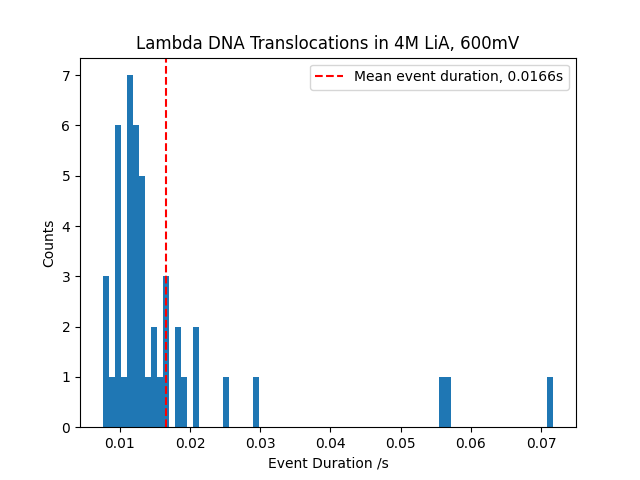

In [17]:
plt.figure()
plt.hist(df_filt.duration_s, bins = 75)
plt.title("Lambda DNA Translocations in 4M LiA, 600mV")
mean = np.mean(df_filt.duration_s)
plt.axvline(mean,ls='--',c='r', label = f"Mean event duration, {mean:.4f}s")
plt.xlabel("Event Duration /s")
plt.ylabel("Counts")
plt.legend()

In [18]:
file.close()